In [5]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np
import math

In [22]:
numsund = [.392]
densund = [1, -.608]
syssund = ct.tf(numsund, densund, .3)
syssund

TransferFunction(array([0.392]), array([ 1.   , -0.608]), 0.3)

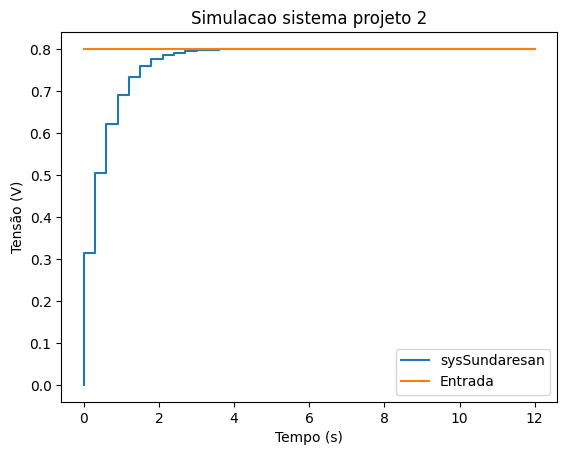

In [25]:
tsund, ampsund = ct.step_response(syssund, 12)
plt.step(tsund, ampsund * .8, label='sysSundaresan')
plt.plot(tsund, [.8] * len(tsund), label = 'Entrada')
plt.title("Simulacao sistema projeto 2")
plt.ylabel("Tensão (V)")
plt.xlabel("Tempo (s)")
plt.legend()
plt.show()

In [35]:
print(ampsund*.8)

[0.         0.3136     0.5042688  0.62019543 0.69067882 0.73353272
 0.7595879  0.77542944 0.7850611  0.79091715 0.79447763 0.7966424
 0.79795858 0.79875882 0.79924536 0.79954118 0.79972104 0.79983039
 0.79989688 0.7999373  0.79996188 0.79997682 0.79998591 0.79999143
 0.79999479 0.79999683 0.79999807 0.79999883 0.79999929 0.79999957
 0.79999974 0.79999984 0.7999999  0.79999994 0.79999996 0.79999998
 0.79999999 0.79999999 0.8        0.8        0.8       ]


In [6]:
nump2 = [0.484683990478516, -0.169156088275486] 
denp2 = [1.0, -0.730644226074219, 0.0461764335632324]
sysp2 = ct.tf(nump2, denp2, .3)
sysp2

TransferFunction(array([ 0.48468399, -0.16915609]), array([ 1.        , -0.73064423,  0.04617643]), 0.3)

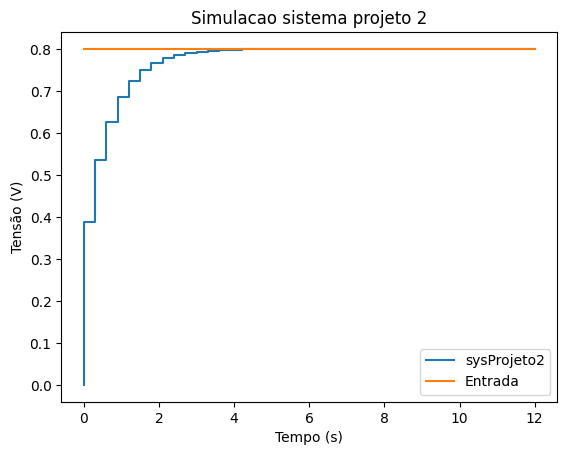

In [26]:
tp2, ampp2 = ct.step_response(sysp2, 12)
plt.step(tp2, ampp2 * .8, label='sysProjeto2')
plt.plot(tsund, [.8] * len(tsund), label = 'Entrada')
plt.title("Simulacao sistema projeto 2")
plt.ylabel("Tensão (V)")
plt.xlabel("Tempo (s)")
plt.legend()
plt.show()


In [8]:
def NMRSE(medidos, estimados):
    n = len(medidos)
    s = 0
    media = 0

    for i in range(0, n):
        d = medidos[i] - estimados[i]
        s += d * d
        media += medidos[i]
        
    media /= n
    sroot = math.sqrt(s / n)
    x = sroot / media
    return 1 - x

def rsquared(medidos, estimados):
    n = len(medidos)
    sq_erro = 0
    sq_total = 0
    x_aux = 0
    x1_aux = 0
    
    for i in range(0, n):
        d = medidos[i] - estimados[i]
        sq_erro += d * d
        x_aux += medidos[i] ** 2
        x1_aux += medidos[i]

    x1_aux *= x1_aux
    sq_total = x_aux - x1_aux / n
    
    return 1 - sq_erro / sq_total

def pearson(medidos, estimados):
    n = len(medidos)
    x_barra = 0
    y_barra = 0
    for i in range(0, n):
        x_barra += medidos[i]
        y_barra += estimados[i]
    x_barra /= n
    y_barra /= n

    s = 0
    sx = 0
    sy = 0
    for i in range(0, n):
        dx = medidos[i] - x_barra
        dy = estimados[i] - y_barra
        s += dx * dy
        sx += dx * dx
        sy += dy * dy
    sx = math.sqrt(sx)
    sy = math.sqrt(sy)
    
    return s / (sx * sy)

def acha_idx(val, vet):
    c = 0
    best = 1e9
    ans = 0
    for x in vet:
        diff = abs(x - val)
        if diff < best:
            best = diff
            ans = c
        c += 1
    return ans
    
def calcula_estatistica(medidos, estimados):
    print('NMRSE = ', NMRSE(medidos, estimados))
    print('r2 = ', rsquared(medidos, estimados))
    print('pearson = ', pearson(medidos, estimados))

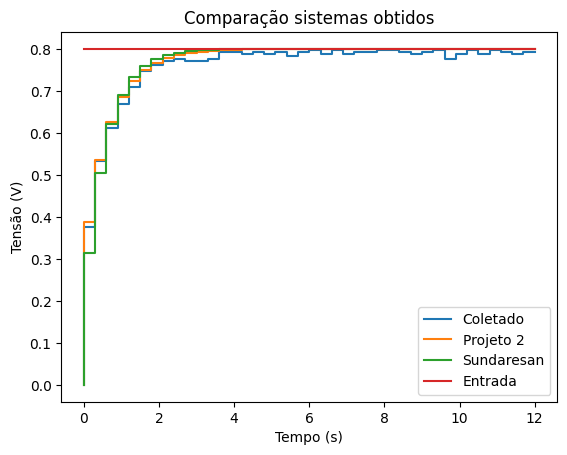

In [28]:
coletado = [0.0, 0.37634, 0.53275, 0.61095, 0.6696, 0.7087, 0.7478, 0.76246, 0.77224, 0.77713, 0.77224, 0.77224, 0.77713, 0.79179, 0.79179, 0.7869, 0.79179, 0.7869, 0.79179, 0.78201, 0.79179, 0.79668, 0.7869, 0.79668, 0.7869, 0.79179, 0.79179, 0.79668, 0.79668, 0.79179, 0.7869, 0.79179, 0.79668, 0.77713, 0.7869, 0.79668, 0.7869, 0.79668, 0.79179, 0.7869, 0.79179]
plt.step(tsund, coletado, label='Coletado')
plt.step(tp2, ampp2 * .8, label='Projeto 2')
plt.step(tsund, ampsund * .8, label='Sundaresan')
plt.plot(tsund, [.8] * len(tsund), label='Entrada')
plt.title("Comparação sistemas obtidos")
plt.ylabel("Tensão (V)")
plt.xlabel("Tempo (s)")
plt.legend()
plt.show()

In [37]:
print('Coletado vs modelo Sundaresan')
calcula_estatistica(coletado, ampsund*.8)
print()
print('Coletado vs Projeto2')
calcula_estatistica(coletado, ampp2*.8)
print()
print('Projeto2 vs Sundaresan')
calcula_estatistica(ampp2*.8, ampsund*.8)

Coletado vs modelo Sundaresan
NMRSE =  0.9778629336751704
r2 =  0.9865833678131626
pearson =  0.9965646168116976

Coletado vs Projeto2
NMRSE =  0.9851243819963665
r2 =  0.9939416631595883
pearson =  0.9992526628177797

Projeto2 vs Sundaresan
NMRSE =  0.9827052031273228
r2 =  0.9917259145936012
pearson =  0.9970395593235265
